In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# images shape (28, 28) >> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
'''
import tensorflow as tf
[0, 1, 2, 3]
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
a = tf.constant(a, shape=[4, 4])
print(a)
[[1,0,0,0],
 [0,1,0,0],
 [0,0,1,0],
 [0,0,0,1]]
 '''


2022-10-04 19:46:23.357654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 19:46:23.448444: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 19:46:23.449246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)


2022-10-04 19:46:23.452360: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-04 19:46:23.452732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 19:46:23.453769: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-04 19:46:23.454733: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

2022-10-04 17:47:42.201279: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-10-04 17:47:42.901697: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


422/422 [==============================] - 3s 4ms/step - loss: 0.3628 - accuracy: 0.8913 - val_loss: 0.0785 - val_accuracy: 0.9787
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.1084 - accuracy: 0.9663 - val_loss: 0.0528 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0830 - accuracy: 0.9743 - val_loss: 0.0465 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0682 - accuracy: 0.9785 - val_loss: 0.0406 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0371 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.9829 - val_loss: 0.0334 - val_accuracy: 0.9913
Epoch 7/15
422/422 [==============================] - 2s 4ms/step - loss: 0.0505 - accuracy: 0.9837 - val_loss: 0.0315 - val_accuracy: 0.9915
Epoch 8/15
422/42

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.022887717932462692
Test accuracy: 0.9926000237464905


Text(0, 0.5, 'Loss')

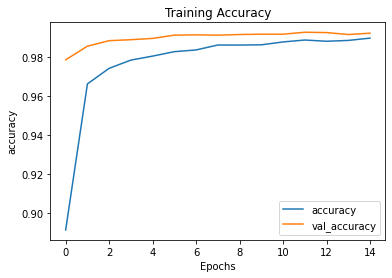

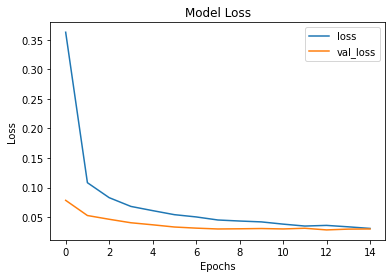

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)

pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")

pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")